# Data Analysis

In [13]:
# Import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 


In [14]:
patients_df = pd.read_csv('analysis_data/patients.csv', dtype={'FIPS Code':str})
patients_df.iloc[-1,0] = 'NA'
patients_df.set_index('FIPS Code', drop=True, inplace=True)
patients_df = patients_df.drop('2021-04', axis = 1)
patients_df 

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
01001,0.0,0.0,14.0,38.0,148.0,326.0,485.0,386.0,331.0,391.0,733.0,1383.0,1536.0,578.0,210.0
01003,0.0,0.0,62.0,131.0,72.0,428.0,2073.0,1370.0,1340.0,937.0,2060.0,3994.0,4489.0,1516.0,417.0
01005,0.0,0.0,0.0,40.0,91.0,146.0,228.0,144.0,147.0,155.0,117.0,258.0,418.0,159.0,68.0
01007,0.0,0.0,0.0,35.0,29.0,97.0,190.0,173.0,114.0,203.0,340.0,563.0,473.0,123.0,53.0
01009,0.0,0.0,13.0,32.0,15.0,144.0,555.0,538.0,297.0,510.0,1083.0,1552.0,993.0,328.0,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
icu_df = pd.read_csv('analysis_data/icu.csv',dtype={'FIPS Code':str})
icu_df.iloc[-1,0] = 'NA'
icu_df.set_index('FIPS Code', drop=True, inplace=True)
icu_df  = icu_df.drop('2021-04', axis = 1)

In [16]:
census_data = pd.read_csv('analysis_data/census_2019.csv',dtype={'FIPS Code':str})
census_data.set_index('FIPS Code', drop=True, inplace=True)
census_data 

,STNAME,CTYNAME,POPESTIMATE2019,TOT_MALE,TOT_FEMALE,0 - 17 years,18 - 49 years,50 - 64 years,65 + years,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other,Lat,Lng
FIPS Code,,,,,,,,,,,,,,,,,,
01001,Alabama,Autauga County,55869,27092,28777,14252,21652,11041,8924,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.6548,32.562500,-86.547800
01003,Alabama,Baldwin County,223234,108247,114987,52268,77402,46734,46830,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.6710,30.554945,-87.723960
01005,Alabama,Barbour County,24686,13064,11622,5595,9477,4753,4861,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.3463,31.787050,-85.429850
01007,Alabama,Bibb County,22394,11929,10465,4992,9233,4436,3733,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.6354,33.059925,-87.145725
01009,Alabama,Blount County,57826,28472,29354,14522,21002,11488,10814,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.7923,33.957085,-86.576808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Wyoming,Sweetwater County,42343,21808,20535,12049,16959,7846,5489,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,0.5841,41.670024,-109.198271
56039,Wyoming,Teton County,23464,12142,11322,4586,10694,4467,3717,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,0.5153,43.515844,-110.815633
56041,Wyoming,Uinta County,20226,10224,10002,6215,7229,3757,3025,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,0.6935,41.293529,-110.539357


In [17]:
death_df = pd.read_csv('analysis_data/death.csv',dtype={'FIPS Code':str})
death_df.iloc[-1,0] = 'NA'
death_df.set_index('FIPS Code', drop=True, inplace=True)
death_df  = death_df.drop('2021-04', axis = 1)

In [18]:
total_abs = pd.read_csv('analysis_data/total_abs.csv',dtype={'FIPS Code':str})
total_abs.iloc[-1,0] = 'NA'
total_abs.set_index('FIPS Code', drop=True, inplace=True)
total_abs

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,6622.0,148.0,0.0,0.0
01003,19052.0,280.0,0.0,119.0
01005,2001.0,62.0,0.0,0.0
01007,2408.0,62.0,0.0,0.0
01009,6376.0,87.0,0.0,11.0
...,...,...,...,...
56039,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0


In [19]:
vaccination_df = pd.read_csv('analysis_data/vaccination_data.csv',dtype={'FIPS Code':str})
vaccination_df.set_index('FIPS Code', drop=True, inplace=True)
vaccination_df = vaccination_df[["Social Vulnerability Index (SVI)","SVI Category","Percent adults fully vaccinated against COVID-19"]]
vaccination_df

,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19
FIPS Code,,,
1001,0.44,Moderate Concern,0.114
1003,0.22,Low Concern,0.176
1005,1.00,Very High Concern,0.128
1007,0.60,High Concern,0.115
1009,0.42,Moderate Concern,0.095
...,...,...,...
56037,0.37,Low Concern,0.228
56039,0.11,Very Low Concern,0.305
56041,0.45,Moderate Concern,0.206


In [64]:
vacc_wa = pd.read_csv('analysis_data/Worst_abs_vacc.csv',dtype={'FIPS':str})
vacc_wa.set_index('FIPS', drop=True, inplace=True)
vacc_wa = vacc_wa.dropna(axis =0)
vacc_wa

,County Name,Pct of Total Pop Fully Vaccinated,Pct of 18+ Pop Fully Vaccinated,Pct of 65+ Pop Fully Vaccinated
FIPS,,,,
6037,Los Angeles County (CA),32.9,41.5,63.7
4013,Maricopa County (AZ),27.6,35.6,63.7
17031,Cook County (IL),32.7,41.4,62.0
12086,Miami Dade (FL),32.0,39.9,70.1
6071,San Bernardino County (CA),24.5,32.8,61.6
6073,San Diego County (CA),24.0,30.2,51.7
6065,Riverside County (CA),26.9,35.4,64.6
36047,Kings County (NY),28.5,36.6,50.0
36081,Queens County(NY),35.4,44.0,60.1


In [66]:
vacc_wr = pd.read_csv('analysis_data/Worst_rel_vacc.csv',dtype={'FIPS':str},encoding='latin1')
vacc_wr.set_index('FIPS', drop=True, inplace=True)
vacc_wr = vacc_wr.dropna(axis =0)
vacc_wr

,County Name,Pct of Total Pop Fully Vaccinated,Pct of 18+ Pop Fully Vaccinated,Pct of 65+ Pop Fully Vaccinated
FIPS,,,,
21003,Allen (KY),25.0,32.4,57.9
27105,Nobles County (MN),38.4,52.8,79.4
20175,Seward County (KS),19.8,29.1,57.5
16065,Madison County (ID),17.9,24.4,73.5
04027,Yuma (AZ),32.0,42.1,57.8
04023,Santa Cruz (AZ),48.2,65.2,89.2
36087,Rockland County ( NY),33.6,46.5,70.6
20057,Ford County (KS),22.8,32.4,68.0
6035,Lassen County (CA),20.3,24.5,61.6


In [20]:
tot_rel = pd.DataFrame((total_abs.iloc[0:-1,:]["Patients"]/census_data["POPESTIMATE2019"]), columns = ["Patients"])
tot_rel["Hospitalized"] = (total_abs.iloc[0:-1,:]["Hospitalized"]/census_data["POPESTIMATE2019"])
tot_rel["ICU"]= (total_abs.iloc[0:-1,:]["ICU"]/census_data["POPESTIMATE2019"])
tot_rel["Death"]= (total_abs.iloc[0:-1,:]["Death"]/census_data["POPESTIMATE2019"])
tot_rel

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,0.118527,0.002649,0.0,0.000000
01003,0.085345,0.001254,0.0,0.000533
01005,0.081058,0.002512,0.0,0.000000
01007,0.107529,0.002769,0.0,0.000000
01009,0.110262,0.001505,0.0,0.000190
...,...,...,...,...
56037,0.000000,0.000000,0.0,0.000000
56039,0.000000,0.000000,0.0,0.000000
56041,0.000000,0.000000,0.0,0.000000


In [21]:
total_abs

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,6622.0,148.0,0.0,0.0
01003,19052.0,280.0,0.0,119.0
01005,2001.0,62.0,0.0,0.0
01007,2408.0,62.0,0.0,0.0
01009,6376.0,87.0,0.0,11.0
...,...,...,...,...
56039,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0


In [25]:
total_abs.loc["21003"]

Patients        3952.0
Hospitalized     194.0
ICU                0.0
Death              0.0
Name: 21003, dtype: float64

In [26]:
census_data.loc["21003"]

STNAME                                                       Kentucky
CTYNAME                                                  Allen County
POPESTIMATE2019                                                 21315
TOT_MALE                                                        10575
TOT_FEMALE                                                      10740
0 - 17 years                                                     5372
18 - 49 years                                                    7718
50 - 64 years                                                    4374
65 + years                                                       3851
Percent Hispanic                                               0.0216
Percent non-Hispanic American Indian/Alaska Native                  0
Percent non-Hispanic Asian                                     0.0062
Percent non-Hispanic Black                                     0.0099
Percent non-Hispanic Native Hawaiian/Pacific Islander               0
Percent non-Hispanic

In [27]:
vaccination_df.loc["21003"]

Social Vulnerability Index (SVI)                            0.68
SVI Category                                        High Concern
Percent adults fully vaccinated against COVID-19           0.188
Name: 21003, dtype: object

In [28]:
vaccination_df.mean()

Social Vulnerability Index (SVI)                    0.500000
Percent adults fully vaccinated against COVID-19    0.188573
dtype: float64

In [29]:
#See most affected FIPS and less affected FIPS ( by patient number)
worst_fip_patient= total_abs.sort_values(by='Patients', ascending=False)
worst_fip_patient.head()

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
NA,1788654.0,59949.0,6205.0,19529.0
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0


In [30]:
worst_ten_pat = worst_fip_patient.iloc[1:11, :]
worst_ten_pat

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0
06071,289868.0,9806.0,1386.0,3724.0
06065,285987.0,7458.0,824.0,3483.0
06073,274033.0,15143.0,1657.0,2833.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0


In [31]:
best_fip_patient= total_abs.sort_values(by='Patients', ascending=True)
best_fip_patient.head(1650)

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
29177,0.0,0.0,0.0,0.0
29143,0.0,0.0,0.0,0.0
29141,0.0,0.0,0.0,0.0
29139,0.0,0.0,0.0,0.0
29137,0.0,0.0,0.0,0.0
...,...,...,...,...
20071,0.0,0.0,0.0,0.0
20181,0.0,0.0,0.0,0.0
20193,0.0,0.0,0.0,0.0


In [32]:
#See most affected FIPS and less affected FIPS ( by death number)
worst_fip_death = total_abs.sort_values(by='Death', ascending=False)

In [33]:
worst_ten_death = worst_fip_death.iloc[0:11, :]
worst_ten_death

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
NA,1788654.0,59949.0,6205.0,19529.0
17031,530918.0,31810.0,5525.0,11573.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0
04013,531243.0,46700.0,1.0,8435.0
36005,176885.0,24002.0,3006.0,6592.0
12086,398878.0,9375.0,1.0,6136.0
06059,251902.0,10366.0,1875.0,4121.0


## Vaccinated vs. Time 

## Time Line for worst FIPS 

In [34]:
#Division to get relative values in the dataframe for cases and months 
rel_time = (patients_df.div(census_data.POPESTIMATE2019, axis=0))*100
rel_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
01001,0.0,0.0,0.025059,0.068016,0.264905,0.583508,0.868102,0.690902,0.592457,0.699851,1.311998,2.475434,2.749289,1.034563,0.375879
01003,0.0,0.0,0.027774,0.058683,0.032253,0.191727,0.928622,0.613706,0.600267,0.419739,0.922798,1.789154,2.010894,0.679108,0.186800
01005,0.0,0.0,0.000000,0.162035,0.368630,0.591428,0.923600,0.583327,0.595479,0.627886,0.473953,1.045127,1.693267,0.644090,0.275460
01007,0.0,0.0,0.000000,0.156292,0.129499,0.433152,0.848442,0.772528,0.509065,0.906493,1.518264,2.514066,2.112173,0.549254,0.236671
01009,0.0,0.0,0.022481,0.055338,0.025940,0.249023,0.959776,0.930377,0.513610,0.881956,1.872860,2.683914,1.717221,0.567219,0.461730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56041,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
56043,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
worst_rel_list = rel_time.sum(axis=1).sort_values(ascending= False)
worst_rel_list.head(11)

FIPS Code
21003    18.540934
27105    18.054464
20175    17.444465
16065    17.255118
04027    17.201701
04023    16.987827
36087    16.890994
20057    16.850590
06035    16.576718
19149    15.677007
40153    15.328287
dtype: float64

In [36]:
w_abs_time=rel_time.loc[["06037","04013","17031","12086","06071","06073","06065","36047", "36081", "06059", "32003"]]
w_abs_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
06037,0.002709,0.001086,0.064697,0.219502,0.299399,0.520126,0.804165,0.399926,0.264496,0.365780,1.132322,3.831118,2.664370,0.430078,0.144336
04013,0.001471,0.000580,0.035671,0.081330,0.175056,1.056759,1.365604,0.300440,0.192424,0.444686,1.366518,2.868186,2.849481,0.632561,0.318231
17031,0.000233,0.001864,0.253348,0.816759,0.581993,0.220844,0.341926,0.417981,0.428544,1.525407,2.239782,1.406635,0.813225,0.316393,0.611254
12086,0.000000,0.001509,0.176927,0.241669,0.209316,0.347855,0.853166,1.822013,0.949046,1.617040,0.558386,0.818826,1.810640,1.561315,3.107945
06071,0.001789,0.000872,0.033210,0.088162,0.172837,0.614563,0.936569,0.428194,0.290631,0.506081,1.853322,4.986916,2.767461,0.410030,0.140958
06073,0.000000,0.000479,0.046850,0.090315,0.120330,0.279451,0.438752,0.237754,0.255787,0.304404,0.926901,2.576528,2.165005,0.457295,0.205971
06065,0.001538,0.000607,0.046791,0.147943,0.198377,0.609541,0.832852,0.353161,0.268443,0.382871,1.239605,3.973130,2.866937,0.445772,0.145636
36047,0.001289,0.008125,0.759013,1.197389,0.347904,0.129302,0.112739,0.099027,0.189265,0.292316,0.665689,1.430054,1.969840,1.309034,1.436226
36081,0.000488,0.009362,0.939944,1.564828,0.360937,0.149122,0.118508,0.090822,0.129068,0.246777,0.757457,1.663858,2.242333,1.382430,1.600988


In [50]:
case_number = ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"]
dates = w_abs_time.columns
index = w_abs_time.index
index


Index(['06037', '04013', '17031', '12086', '06071', '06073', '06065', '36047',
       '36081', '06059', '32003'],
      dtype='object', name='FIPS Code')

<function matplotlib.pyplot.show(close=None, block=None)>

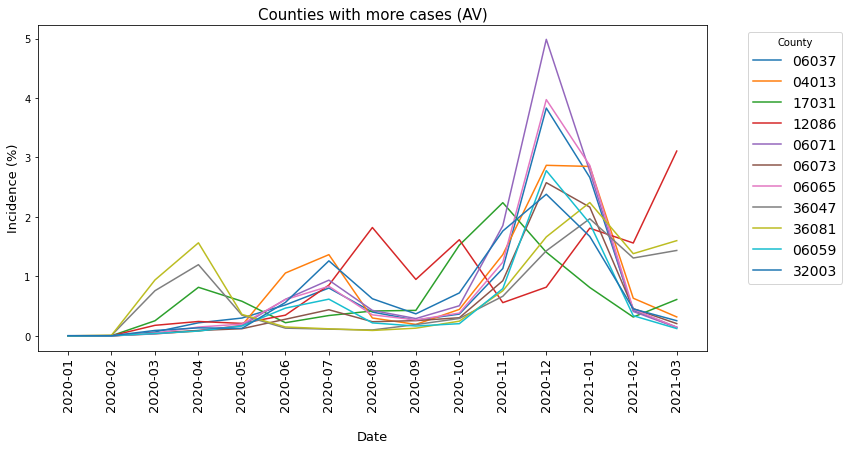

In [89]:

#for index,label in w_abs_time.iterrows():
plt.figure(figsize=(12,6))
plt.plot(w_abs_time.T.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],rotation=90, fontsize =13)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left',labels = index, fontsize=14)

#Add labels
plt.title("Counties with more cases (AV)", fontsize = 15)
plt.xlabel("\nDate", fontsize = 13)
plt.ylabel("Incidence (%)", fontsize = 13)
plt.show

In [52]:
patients_time=patients_df.loc[["06037","04013","17031","12086","06071","06073","06065","36047", "36081", "06059", "32003"]]
patients_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
06037,272.0,109.0,6495.0,22036.0,30057.0,52216.0,80731.0,40149.0,26553.0,36721.0,113675.0,384610.0,267479.0,43176.0,14490.0
04013,66.0,26.0,1600.0,3648.0,7852.0,47400.0,61253.0,13476.0,8631.0,19946.0,61294.0,128650.0,127811.0,28373.0,14274.0
17031,12.0,96.0,13048.0,42065.0,29974.0,11374.0,17610.0,21527.0,22071.0,78562.0,115354.0,72445.0,41883.0,16295.0,31481.0
12086,0.0,41.0,4807.0,6566.0,5687.0,9451.0,23180.0,49503.0,25785.0,43934.0,15171.0,22247.0,49194.0,42420.0,84441.0
06071,39.0,19.0,724.0,1922.0,3768.0,13398.0,20418.0,9335.0,6336.0,11033.0,40404.0,108719.0,60333.0,8939.0,3073.0
06073,0.0,16.0,1564.0,3015.0,4017.0,9329.0,14647.0,7937.0,8539.0,10162.0,30943.0,86013.0,72275.0,15266.0,6876.0
06065,38.0,15.0,1156.0,3655.0,4901.0,15059.0,20576.0,8725.0,6632.0,9459.0,30625.0,98158.0,70829.0,11013.0,3598.0
36047,33.0,208.0,19430.0,30652.0,8906.0,3310.0,2886.0,2535.0,4845.0,7483.0,17041.0,36608.0,50426.0,33510.0,36766.0
36081,11.0,211.0,21185.0,35269.0,8135.0,3361.0,2671.0,2047.0,2909.0,5562.0,17072.0,37501.0,50539.0,31158.0,36084.0


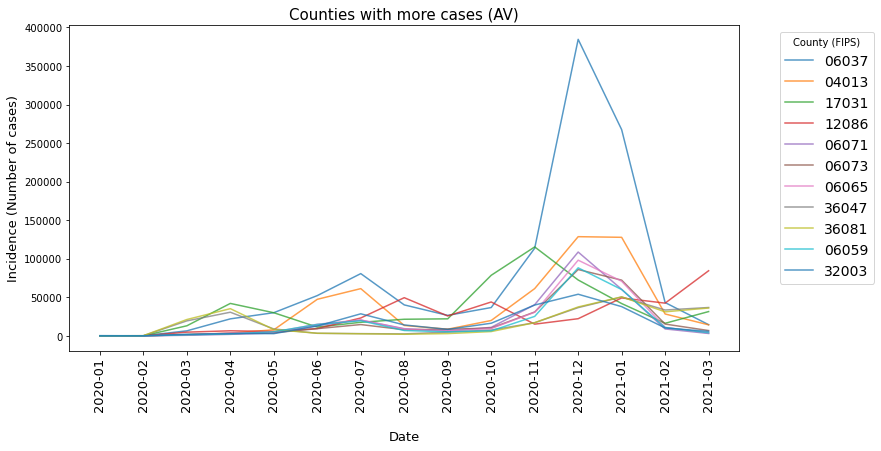

In [93]:
#Plot figure for most affected counties ( found in absolute, shown in absolute)
plt.figure(figsize=(12,6))
plt.plot(patients_time.T.values, alpha = 0.75)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],rotation=90, fontsize =13)
plt.legend(title='County (FIPS)', bbox_to_anchor=(1.05, 1), loc='upper left',labels = index, fontsize =14)
#Add labels
plt.title("Counties with more cases (AV)", fontsize = 15)
plt.xlabel("\nDate", fontsize = 13)
plt.ylabel("Incidence (Number of cases)", fontsize = 13)

plt.show()

In [56]:
w_rel_time= rel_time.loc[["21003","27105","20175","16065","04027","04023","36087","20057", "06035", "19149", "40153"]]
w_rel_time

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
21003,0.000000,0.000000,0.000000,0.079756,0.455079,0.370631,0.422238,0.441004,0.647431,1.158808,3.645320,4.034717,5.062163,1.060286,1.163500
27105,0.000000,0.000000,0.000000,5.233714,2.066670,0.397614,0.383744,0.633409,0.559434,2.408803,3.143927,1.659809,0.910814,0.383744,0.272782
20175,0.000000,0.000000,0.000000,2.804741,1.250700,0.541348,0.709352,0.690685,1.526041,2.090722,4.078775,2.426731,0.877357,0.233340,0.214672
16065,0.000000,0.000000,0.000000,0.027564,0.030070,0.050117,0.228030,0.310722,2.425640,4.377678,3.879019,2.122435,1.443356,1.037412,1.323076
04027,0.000000,0.000000,0.010291,0.066421,0.734376,2.569848,1.916393,0.453255,0.272234,0.711924,2.543186,4.493257,2.796709,0.463545,0.170263
04023,0.000000,0.000000,0.000000,0.077423,1.012947,3.400146,1.225859,0.268829,0.195707,0.546260,2.554949,4.473311,2.499032,0.404318,0.329046
36087,0.008288,0.006753,2.149551,3.058114,2.901264,1.271682,0.669452,0.440469,0.603151,0.798983,1.116674,1.126496,1.167320,0.626479,0.946318
20057,0.000000,0.000000,0.035694,2.641364,2.706803,0.574080,0.386686,0.817990,1.793629,1.951278,3.164877,1.374223,0.803117,0.309349,0.291502
06035,0.000000,0.000000,0.000000,0.000000,0.000000,0.762110,1.272365,0.278023,0.081771,0.137376,5.079645,7.110849,1.246198,0.569130,0.039250


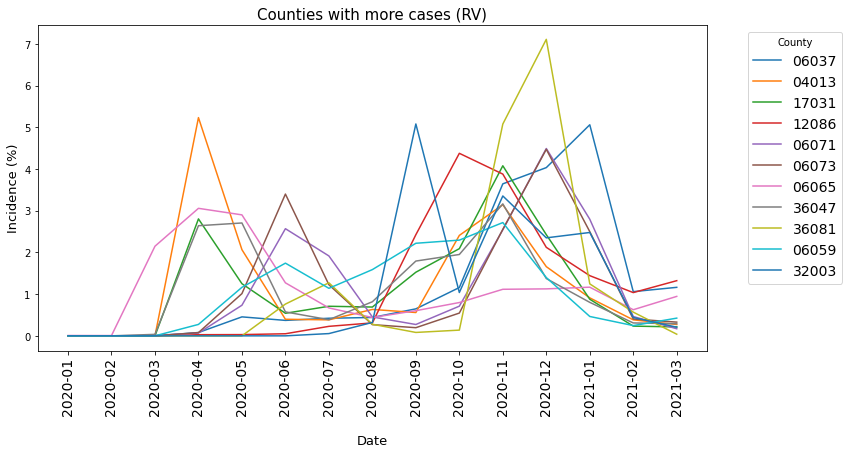

In [94]:
plt.figure(figsize=(12,6))
plt.plot(w_rel_time.T.values)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], ["2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],rotation=90, fontsize = 14)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left',labels = index, fontsize =14)

#Add labels
plt.title("Counties with more cases (RV)", fontsize = 15)
plt.xlabel("\nDate", fontsize = 13)
plt.ylabel("Incidence (%)", fontsize = 13)
plt.show()

## Sex, ethnic group and age of best against worst FIPS

## Scatter (patients and vaccinated) 

## Bars for ethnic groups 

## Heatmap 

## Regressions for sex, age and ethnic group 